# Deep Learning Term Project for ECG (DIL700)

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
import os
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from general_functions import *
import pickle
import json
from keras.models import model_from_json
from sklearn.metrics import accuracy_score


from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')

## Loading Dataset MIT-BIH

Collect all the data from the csv files

In [2]:
# # Original data

# train_df=combine_csv_files_to_df('./Dataset_mitbih/Training/')
# test_df=combine_csv_files_to_df('./Dataset_mitbih/Testing/')

# Synthetic data

train_df = pd.read_csv('./Dataset_mitbih/Synthetic/mitbih_with_syntetic_train.csv')
train_df = train_df.iloc[:, :-1]
train_df.rename(columns={'class': 187}, inplace=True)
test_df = pd.read_csv('./Dataset_mitbih/Synthetic/mitbih_with_syntetic_test.csv')
test_df = test_df.iloc[:, :-1]
test_df.rename(columns={'class': 187}, inplace=True)

In [3]:
# train_df = train_df[train_df[187] != 3]
# test_df = test_df[test_df[187] != 3]
# full_df = full_df[full_df[187] != 3]

# train_df = train_df[train_df[187] != '3.0']
# test_df = test_df[test_df[187] != '3.0']
# full_df = full_df[full_df[187] != '3.0']

train_df = train_df[train_df[187] != 'class']
test_df = test_df[test_df[187] != 'class']
# full_df = full_df[full_df[187] != 'class']

# train_df.loc[train_df[187] == 4, 187] = 3.0
# test_df.loc[test_df[187] == 4, 187] = 3.0
# full_df.loc[full_df[187] == 4, 187] = 3.0

# train_df.loc[train_df[187] == '4.0', 187] = 3.0
# test_df.loc[test_df[187] == '4.0', 187] = 3.0
# full_df.loc[full_df[187] == '4.0', 187] = 3.0

train_df.loc[train_df[187] == '0.0', 187] = 0.0
train_df.loc[train_df[187] == '1.0', 187] = 1.0
train_df.loc[train_df[187] == '2.0', 187] = 2.0
train_df.loc[train_df[187] == '3.0', 187] = 3.0
train_df.loc[train_df[187] == '4.0', 187] = 4.0

In [4]:
print(train_df[187].unique())

[0. 1. 2. 4. 3.]


In [5]:
labels = ['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion', 'Paced']
labels_short =  ["N","S","V",'F',"Q"]

In [6]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.773913,0.142029,0.057971,0.130435,0.217391,0.220290,0.263768,0.255072,0.260870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.824490,0.208163,0.048980,0.089796,0.122449,0.106122,0.130612,0.183673,0.167347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.879518,0.812048,0.115663,0.000000,0.130120,0.180723,0.183133,0.200000,0.197590,0.202410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.968432,0.735234,0.344196,0.153768,0.161914,0.130346,0.113035,0.114053,0.120163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.804800,0.704000,0.574400,0.416000,0.257600,0.145600,0.072000,0.057600,0.083200,0.176000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96369,1.000000,0.922535,0.371479,0.026408,0.061620,0.065141,0.040493,0.040493,0.029930,0.026408,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96370,1.000000,0.835079,0.316754,0.047120,0.068063,0.073298,0.031414,0.000000,0.002618,0.015707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96371,0.028497,0.168394,0.207254,0.256477,0.375648,0.515544,0.559586,0.528497,0.528497,0.551813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
96372,1.000000,0.942396,0.748848,0.626728,0.592166,0.569124,0.533410,0.505760,0.487327,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
full_df=pd.concat([train_df,test_df],ignore_index=True)
full_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.773913,0.142029,0.057971,0.130435,0.217391,0.220290,0.263768,0.255072,0.260870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.824490,0.208163,0.048980,0.089796,0.122449,0.106122,0.130612,0.183673,0.167347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.879518,0.812048,0.115663,0.000000,0.130120,0.180723,0.183133,0.200000,0.197590,0.202410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.968432,0.735234,0.344196,0.153768,0.161914,0.130346,0.113035,0.114053,0.120163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.804800,0.704000,0.574400,0.416000,0.257600,0.145600,0.072000,0.057600,0.083200,0.176000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113377,0.938628,0.563177,0.570397,0.563177,0.566787,0.537906,0.527076,0.436823,0.328520,0.191336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
113378,0.789969,0.684953,0.581505,0.457680,0.341693,0.199060,0.115987,0.036050,0.017241,0.023511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
113379,0.851380,1.000000,0.949045,0.847134,0.838641,0.757962,0.711253,0.670913,0.486200,0.284501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
113380,1.000000,0.630931,0.000000,0.072056,0.063269,0.094903,0.131810,0.135325,0.135325,0.142355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create feautures and labels for dataset MIT-BIH

Create different dataframes for training/testing data and labels.
Also OneHotEncoding for the labels and renaming the classes

In [8]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=82)

y_train_nn = pd.get_dummies(y_train, columns=[1])
y_train_nn = y_train_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"})

y_valid_nn = pd.get_dummies(y_valid, columns=[1])
y_valid_nn = y_valid_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"})

X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]
y_test_nn = pd.get_dummies(y_test, columns=[1])
y_test_nn = y_test_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"})

# Load first model

In [9]:
# load cnn model with h5 and json file
from keras.models import model_from_json
json_file = open('saved_models/CNN_MITBIH_with_GAN_Data_23032023_113101/CNN_MITBIH_with_GAN_Data.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_1= model_from_json(loaded_model_json)

# Then load the weights
model_1.load_weights("saved_models/CNN_MITBIH_with_GAN_Data_23032023_113101/CNN_MITBIH_with_GAN_Data.h5")

# Check performance for test set

In [10]:
# Predict test set labels
y_pred_1  = model_1.predict(X_test)
y_pred_model_1 = np.argmax(y_pred_1 , axis=1)

print('Accuracy of CNN: ', accuracy_score(y_test, y_pred_model_1))

532/532 [==============================] - 4s 4ms/step
Accuracy of CNN:  0.9867121354656632


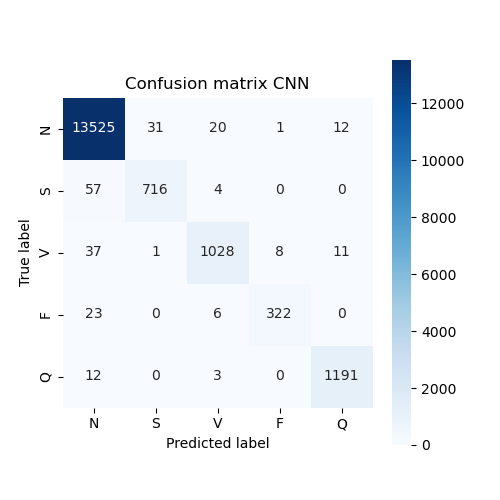

In [11]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_model_1)

# Plot confusion matrix
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix CNN')
ax.xaxis.set_ticklabels(labels_short)
ax.yaxis.set_ticklabels(labels_short)
plt.show()

In [12]:
print(classification_report(y_test, y_pred_model_1, target_names=labels, digits=4))

                                   precision    recall  f1-score   support

                           Normal     0.9906    0.9953    0.9929     13589
                 Artial Premature     0.9572    0.9215    0.9390       777
Premature ventricular contraction     0.9689    0.9475    0.9581      1085
                           Fusion     0.9728    0.9174    0.9443       351
                            Paced     0.9811    0.9876    0.9843      1206

                         accuracy                         0.9867     17008
                        macro avg     0.9741    0.9538    0.9637     17008
                     weighted avg     0.9866    0.9867    0.9866     17008



# Check performance for full dataset

In [13]:
X_full = full_df.iloc[:, :-1]
y_full = full_df.iloc[:, -1]

y_full_nn = pd.get_dummies(y_full, columns=[1])
y_full_nn = y_full_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "Q"})

In [14]:
# Predict test set labels
y_pred_2  = model_1.predict(X_full)
y_pred_model_2 = np.argmax(y_pred_2 , axis=1)
# Y_full to ndarray and integer
y_full = y_full.astype(int)

print('Accuracy of CNN: ', accuracy_score(y_full, y_pred_model_2))

3544/3544 [==============================] - 11s 3ms/step
Accuracy of CNN:  0.9899807729621986


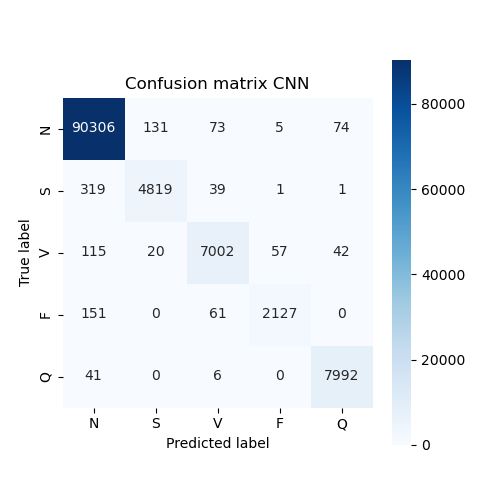

In [15]:
# Calculate confusion matrix
cm = confusion_matrix(y_full, y_pred_model_2)

# Plot confusion matrix
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix CNN')
ax.xaxis.set_ticklabels(labels_short)
ax.yaxis.set_ticklabels(labels_short)
plt.show()

In [16]:
print(classification_report(y_full, y_pred_model_2, target_names=labels, digits=4))

                                   precision    recall  f1-score   support

                           Normal     0.9931    0.9969    0.9950     90589
                 Artial Premature     0.9696    0.9305    0.9497      5179
Premature ventricular contraction     0.9751    0.9677    0.9714      7236
                           Fusion     0.9712    0.9094    0.9393      2339
                            Paced     0.9856    0.9942    0.9898      8039

                         accuracy                         0.9900    113382
                        macro avg     0.9789    0.9597    0.9690    113382
                     weighted avg     0.9899    0.9900    0.9899    113382



# Check performance for PTB-DB dataset (not mandatory)

In [17]:
normal_df = pd.read_csv('./Dataset_ptbdb/ptbdb_normal.csv',header=None)
abnormal_df = pd.read_csv('./Dataset_ptbdb/ptbdb_abnormal.csv',header=None)
# Combine to a full dataset
full_df_ptb = pd.concat([normal_df, abnormal_df], axis=0, ignore_index=True)

In [18]:
from sklearn.model_selection import train_test_split

# split the data into features and target
X_ptb = full_df_ptb.drop(187, axis=1)
y_ptb = full_df_ptb[187]

# Split data into training and testing sets
X_train_full_ptb, X_test_ptb, y_train_full_ptb, y_test_ptb = train_test_split(X_ptb, y_ptb, test_size=0.20, stratify=y_ptb, random_state=42)

In [19]:
# validation data
X_train_ptb, X_valid_ptb, y_train_ptb, y_valid_ptb = train_test_split(X_train_full_ptb, y_train_full_ptb, test_size=0.20, stratify=y_train_full_ptb, random_state=42)

In [20]:
train_df_ptb = X_train_ptb.copy()
train_df_ptb[187] = y_train_ptb
valid_df_ptb = X_valid_ptb.copy()
valid_df_ptb[187] = y_valid_ptb
test_df_ptb = X_test_ptb.copy()	
test_df_ptb[187] = y_test_ptb

train_df_ptb

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
12529,1.000000,0.829819,0.467386,0.203531,0.208926,0.182442,0.073075,0.078470,0.067680,0.049044,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
8792,0.905602,0.734440,0.354772,0.154046,0.122925,0.165975,0.176349,0.177905,0.182054,0.176867,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
13408,1.000000,0.808531,0.117995,0.109900,0.061021,0.031756,0.022416,0.011519,0.006849,0.027086,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
2746,1.000000,0.529361,0.199217,0.094824,0.107873,0.109178,0.088734,0.079600,0.074815,0.075685,...,0.055676,0.055676,0.057851,0.060896,0.067856,0.066551,0.0,0.0,0.0,0.0
366,1.000000,0.700711,0.349063,0.106658,0.077569,0.301228,0.371041,0.371687,0.404008,0.411765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13768,0.888561,0.430425,0.423939,0.391509,0.364976,0.339623,0.290094,0.295401,0.312500,0.303066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
5609,1.000000,0.338724,0.017969,0.000000,0.415993,0.477987,0.510332,0.546271,0.587601,0.543576,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
2442,1.000000,0.551974,0.231668,0.007252,0.023368,0.076551,0.101128,0.092264,0.089847,0.087429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
11291,0.988811,0.376690,0.000000,0.014918,0.049417,0.059207,0.076457,0.055478,0.035431,0.037296,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0


In [21]:
# Predict test set labels
y_pred_ann_proba  = model_1.predict(X_test_ptb)
y_pred_ann = np.argmax(y_pred_ann_proba , axis=1)

# If y_pred_ann is higher than 0.5, then the prediction is 1.0, otherwise 0.0
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

y_test_ptb = y_test_ptb.astype(int)

print('Accuracy of CNN: ', accuracy_score(y_test_ptb, y_pred_ann))

91/91 [==============================] - 1s 7ms/step
Accuracy of CNN:  0.3187907935417382


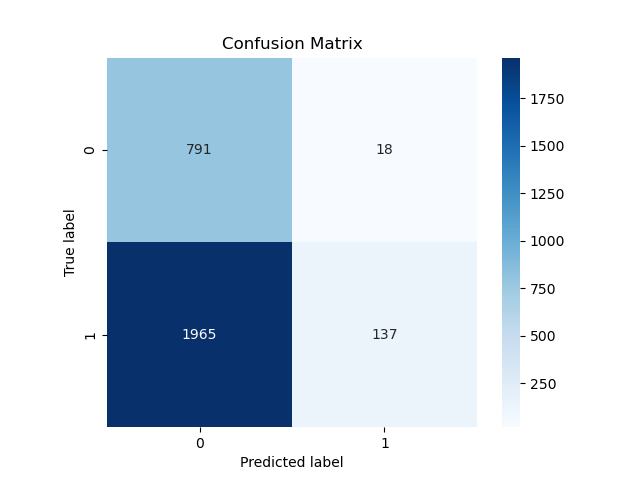

In [22]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_ptb, y_pred_ann)

# Plot confusion matrix
plt.figure()
ax = plt.subplot(111)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
# ax.xaxis.set_ticklabels(labels)
# ax.yaxis.set_ticklabels(labels)
plt.show()

In [23]:
print(classification_report(y_test_ptb, y_pred_ann))

              precision    recall  f1-score   support

           0       0.29      0.98      0.44       809
           1       0.88      0.07      0.12      2102

    accuracy                           0.32      2911
   macro avg       0.59      0.52      0.28      2911
weighted avg       0.72      0.32      0.21      2911

